In [1]:
!pip install -qU transformers sentence-transformers
!pip install scipy spacy nltk textstat
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import requests
from requests.exceptions import RequestException

# Made for Ooba server mainly but it seems to work with Kobold too as long as you're using an OpenAI compatible API.
class SingletonMeta(type):
    _instances = {}
    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            cls._instances[cls] = super().__call__(*args, **kwargs)
        return cls._instances[cls]

class APIManager(metaclass=SingletonMeta):
    def __init__(self):
        self.session = requests.Session()

    def _api_request(self, method, url, **kwargs):
        try:
            response = self.session.request(method, url, **kwargs)
            response.raise_for_status()
            return response.json()
        except RequestException as e:
            raise Exception(f'API request error: {e}')

    # Works with Ooba only (just to print the model used)
    def model_name(self, api_url):
        return self._api_request('GET', f'{api_url}/v1/internal/model/info').get('model_name')

    def run(self, prompt, seed, temperature, api_url="https://placeholder_your_api_url"):
        request = {
            'prompt': prompt,
            'max_tokens': 2048,
            'temperature': temperature,
            'temperature_last': False,
            'dynamic_temperature': False,
            'dynamic_temperature_low': 0.1,
            'do_sample': True,
            'top_p': 0.9,
            'min_p': 0.0,
            'top_k': 0,
            'typical_p': 1.0,
            'tfs': 1.0,
            'top_a': 0.0,
            'repetition_penalty': 1.0,
            'min_new_tokens': 200,
            'no_repeat_ngram_size': 0,
            'num_beams': 1,
            'early_stopping': False,
            'seed': seed,
            'add_bos_token': True,
            'truncation_length': 8192,
            'ban_eos_token': False,
            'skip_special_tokens': True
        }
        response = self._api_request('POST', f'{api_url}/v1/completions', json=request)
        return response['choices'][0]['text']

api_manager = APIManager()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2024-06-27 15:09:37.022874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 15:09:37.023054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 15:09:37.185076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Starting MCTS algorithm for:  'Write a short story about a cat finding an owner.'
--------------
Root answer
--------------
 Mittens was just a tiny ball of grey fur, abandoned in a cardboard box on a lonely street corner. Her blue eyes, once bright with curiosity, now seemed dull and lifeless as she huddled in the cold shadows, her tiny belly growling with hunger.

Days turned into weeks, and still no one claimed the little cat. She survived by scavenging for scraps, her once-luxurious coat now matted and dirty. As the winter chill set in, Mittens' chances of finding a warm, loving home seemed to dwindle with each passing day.

That is, until one brisk afternoon when a kind-faced woman in a green coat spotted the forlorn creature. "Poor thing," she murmured, crouching down to examine Mittens. The cat's tail twitched slightly at the unfamiliar presence, but she remained still, too tired to flee or fight.

The woman scooped up the cat, cradling her gently in her arms as she made her way

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Auto-eval: {"score": 43, "analysis": 
"The story has a clear structure and follows a heartwarming narrative arc as the stray cat, Mittens, finds a loving owner in Sophia. The vivid descriptions of Mittens' miserable conditions in the alley and her gradual trust of Sophia effectively convey her plight and emotional journey.

However, the writing could benefit from more nuanced characterization, particularly for Sophia. While her kindness and compassion are evident, the story doesn't delve deeper into her motivations or personality. 

The dialogue, when present, feels somewhat flat and unnatural, such as Sophia's bland 'Poor thing' upon seeing Mittens. Adding more distinctive voice and emotional resonance to the conversations could enhance the story's impact.

Additionally, some scenes, like Mittens' adjustment to her new home, are glossed over relatively quickly. Expanding on these moments could provide a more satisfying character arc for Mittens and Sophia's bond.

In terms of style, t

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Auto-eval: {"score": 43, "analysis": 
"Lily's story is a poignant tale of a cat finding love and redemption with her new owner, Sophia. However, there are several areas that detract from the narrative's overall impact:

1. Overly sentimental tone: The story leans heavily on clichés and sentimental language, such as 'vibrant hue once shining in her eyes,''soothing balm,' and 'heart swelled with love and gratitude.' These clichés make the writing feel trite and lack nuance.

2. Lack of sensory details: While the story provides some basic descriptions, it fails to engage the reader's senses. There's a dearth of vivid, multi-sensory details that could bring the characters and setting to life. For example, what specific foods does Sophia feed Lily? How does the apartment smell, sound, and feel?

3. Underdeveloped characters: Sophia and Lily are one-dimensional, with Sophia being defined solely by her kindness and Lily's backstory. Giving both characters more depth, motivations, and distinct

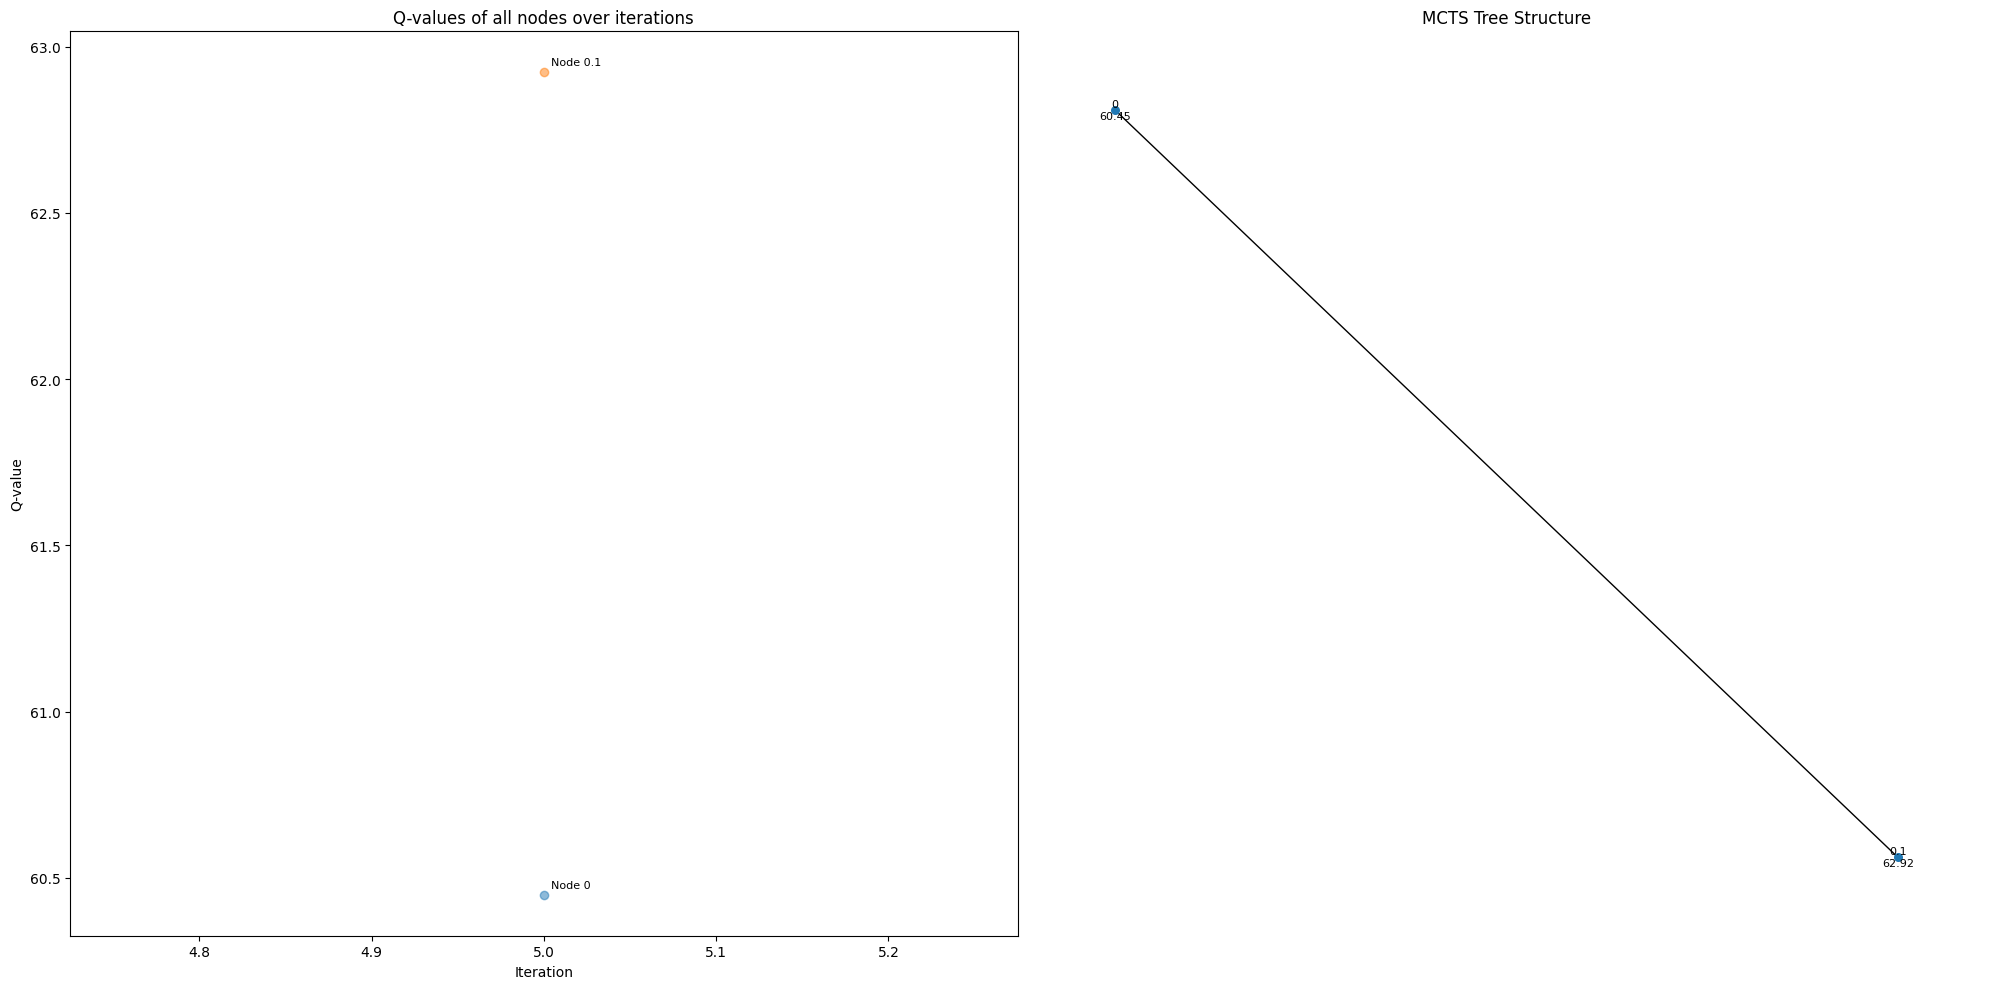

Figure saved as mcts_visualization.png
State saved to mcts_state_final.json


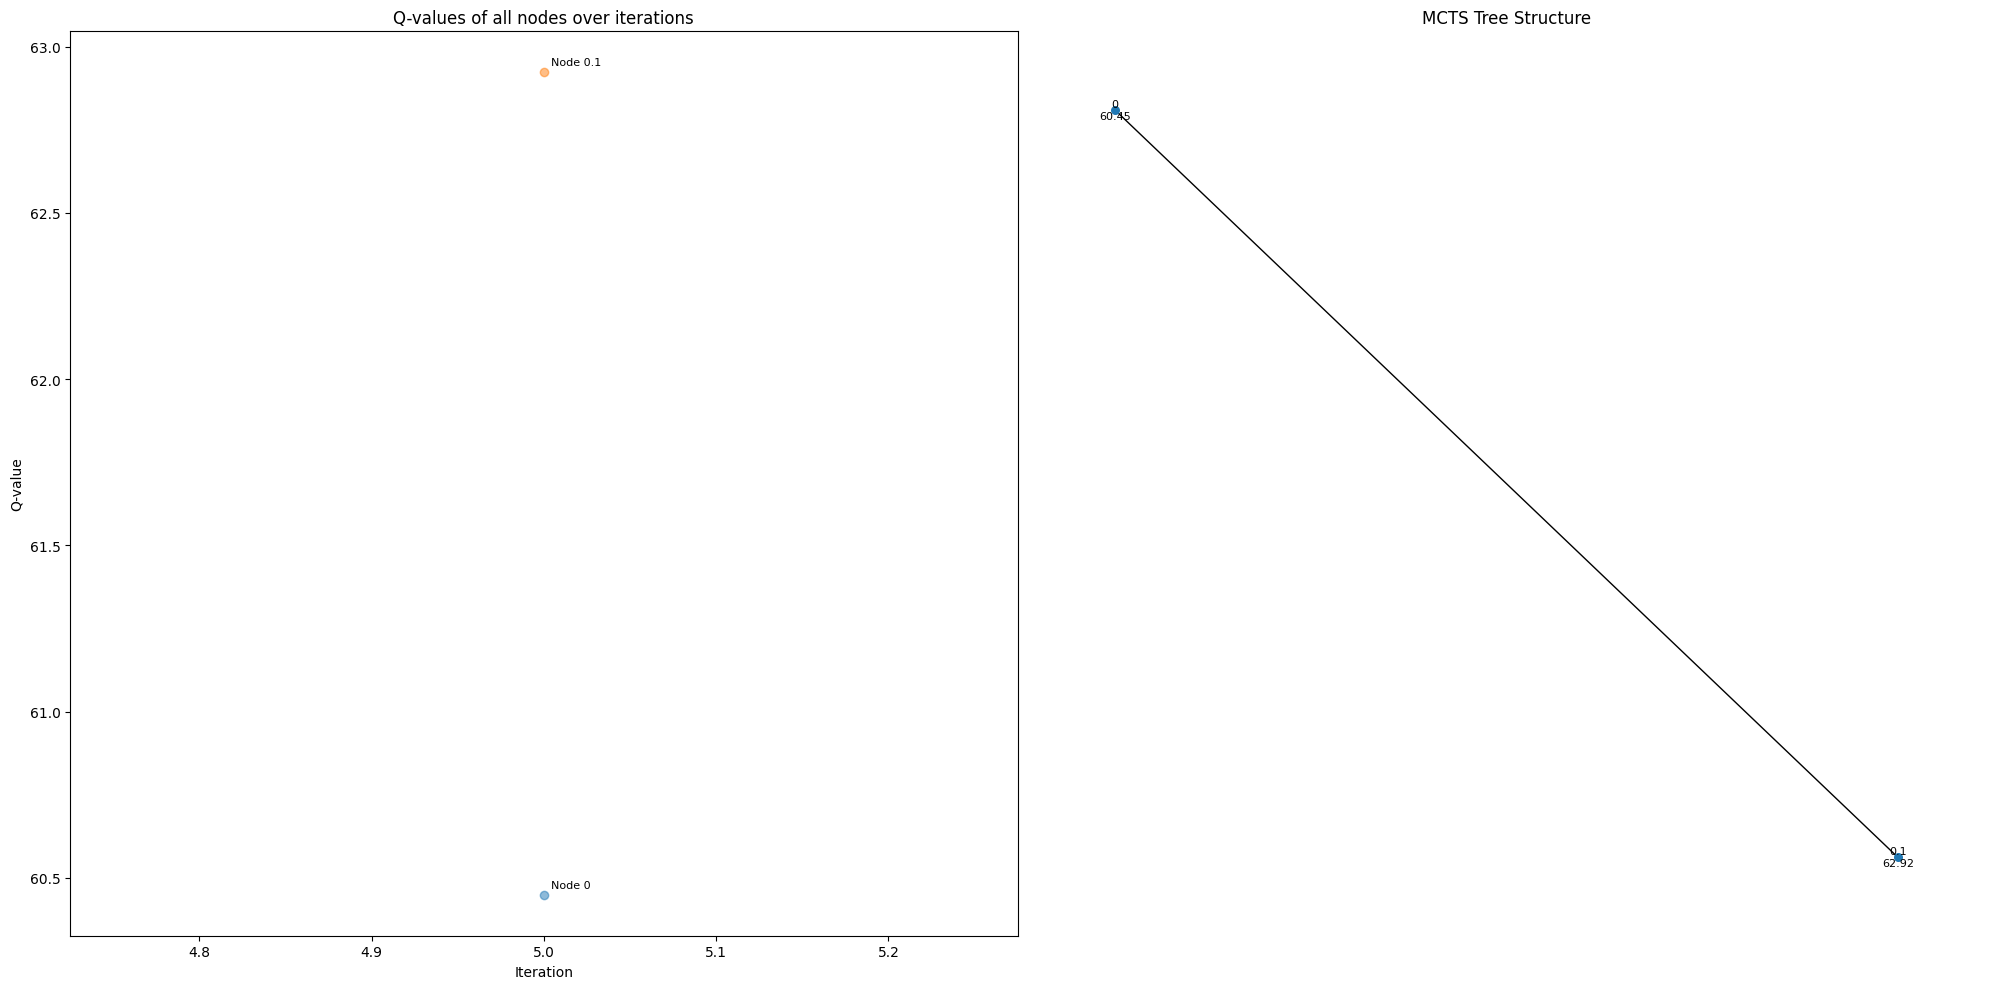

In [3]:
import os
import math
import json
import random
import numpy as np
import re
import ast
import torch
import matplotlib
import matplotlib.pyplot as plt
import statistics
from collections import deque, defaultdict
from difflib import SequenceMatcher
from matplotlib.patches import Rectangle
from IPython.display import display, update_display, clear_output
import networkx as nx
%matplotlib inline

# For Metrics
from collections import Counter
from itertools import tee
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import spacy
import nltk
nltk.download('punkt') # Not needed on Kaggle
from nltk.tokenize import sent_tokenize
from textstat import flesch_reading_ease
from textblob import TextBlob
from sentence_transformers import SentenceTransformer

def set_seed(seed):
    """ Set the seed for all possible sources of randomness to ensure reproducibility """
    random.seed(seed)           # Python's built-in random module
    np.random.seed(seed)        # NumPy's random module
    torch.manual_seed(seed)     # PyTorch's random number generator for the CPU
    torch.cuda.manual_seed_all(seed)  # PyTorch's random number generator for all GPUs
    torch.backends.cudnn.deterministic = True  # Use deterministic algorithms where possible
    torch.backends.cudnn.benchmark = False     # Do not optimize convolution operations for varying input sizes

# Set the seed for reproducibility
seed = 42
set_seed(seed)


class LLMInterface:
    INSTRUCTION_SET = 'llama3'

    @classmethod
    def ask_llm_remote(cls, prompt):
        topic = PromptManager.get_topic()
        temperature = 0.5
        if topic == 'creative':
            temperature = 1.0
        try:
            full_response = api_manager.run(prompt, seed=seed, temperature=temperature)
        except Exception as e:
            print(f"Error calling LLM API: {e}")
            return None

        response_delimiters = {
            'alpaca': "### Response:\n",
            'vicuna': "### ASSISTANT:",
            'llama3': "assistant\n\n",
            'chatml': "<|im_start|>assistant\n"
        }
        response_delimiter = response_delimiters[cls.INSTRUCTION_SET]
        response = full_response.split(response_delimiter)[-1].strip() if response_delimiter in full_response else full_response
        return response.lstrip() 
    
    @classmethod
    def replace_placeholders(cls, prompt_parts):
        """ Replace placeholders in the prompt with the selected instruction set """
        instruction_sets = {
            "alpaca": {
                "instruction": "### Instruction:\n",
                "input": "### Input:\n",
                "response": "### Response:\n"
            },
            "vicuna": {
                "instruction": "### USER:\n",
                "response": "### ASSISTANT:\n"
                # Note: No "input" for Vicuna
            },
            "llama3": {
                "instruction": "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\n",
                "input": "<|start_header_id|>user<|end_header_id|>\n\n",
                "response": "<|start_header_id|>assistant<|end_header_id|>\n\n",
                "end": "<|eot_id|>\n"
            },
            "chatml": {
                "instruction": "<|im_start|>system\n",
                "input": "<|im_start|>user\n",
                "response": "<|im_start|>assistant\n",
                "end": "<|im_end|>\n"
            }
        }

        selected_set = instruction_sets.get(cls.INSTRUCTION_SET)
        if not selected_set:
            raise ValueError(f"Instruction set {cls.INSTRUCTION_SET} is not defined.")

        if isinstance(prompt_parts, tuple):
            prompt_parts = [prompt_parts]

        final_prompt = ""
        prepend_response = ""
        for text, part in prompt_parts:
            if part == "response":
                prepend_response = text
            if part in selected_set:
                final_prompt += f"{selected_set[part]}{text}"
                if "end" in selected_set:
                    final_prompt += selected_set['end']
            elif part == "input" and "input" not in selected_set:
                # Merge input part with the instruction for sets that do not support "input"
                final_prompt += f"{text}"
                if "end" in selected_set:
                    final_prompt += selected_set['end']

        final_prompt += f"{selected_set['response']}{prepend_response}"
        return final_prompt

    @classmethod
    def set_instruction_set(cls, instruction_set):
        if instruction_set in ["alpaca", "vicuna", "llama3", "chatml"]:
            cls.INSTRUCTION_SET = instruction_set
        else:
            raise ValueError(f"Unsupported instruction set: {instruction_set}")

            
class Node:
    node_counter = 0
    
    def __init__(self, question, answer, feedback=None, refined_answer=None, parent=None):
        self.id = self.generate_id(parent)
        self.question = question
        self.answer = answer
        self.feedback = feedback
        self.refined_answer = refined_answer
        self.parent = parent
        self.children = set()
        self.visits = 0
        self.rewards = deque(maxlen=100)  # Store only the last 100 rewards
        self.reward_sum = 0
        self.reward_sum_squared = 0
        self.Q_value = 0
        self.previous_Q_value = 0
        self.max_children = 5
        self.importance_weight = 1.0
        self.depth = 0 if parent is None else parent.depth + 1
        self.aging_factor = 0.98

    @classmethod
    def generate_id(cls, parent):
        if parent is None:
            cls.node_counter += 1
            return str(cls.node_counter - 1)
        else:
            parent_id = parent.id
            child_number = len(parent.children) + 1
            return f"{parent_id}.{child_number}"

    def __str__(self):
        return f"Node_{self.id}"        
        
        
    def increment_visits(self):
        self.visits += 1

    def update_Q(self):
        # Update previous Q-value
        self.previous_Q_value = self.Q_value

        # Formula from the paper based on the minimum and average of the rewards
        if self.rewards:
            min_reward = min(self.rewards)
            avg_reward = sum(self.rewards) / len(self.rewards)
            self.Q_value = 0.5 * (min_reward + avg_reward)

        else:
            # If there are no rewards, and no children, default to Q-value of 0
            if not self.children:
                self.Q_value = 0
            else:
                # Optionally include children's Q-values
                self.Q_value = max(child.Q_value for child in self.children)

        # Ensure Q-value stays within the range
        self.Q_value = max(0, min(100, self.Q_value))

    def add_reward(self, reward):
        if len(self.rewards) == self.rewards.maxlen:
            old_reward = self.rewards[0]
            self.reward_sum -= old_reward
            self.reward_sum_squared -= old_reward ** 2
        
        self.rewards.append(reward)
        self.reward_sum += reward
        self.reward_sum_squared += reward ** 2 

    def get_ancestors(self):
        """ Collect all ancestor nodes for a given node. """
        ancestors = []
        current = self.parent
        while current:
            ancestors.append(current)
            current = current.parent
        return ancestors    

    def analyze_historical_performance(self):
        """ Analyze the feedback of ancestors to identify common issues using fuzzy matching. """
        ancestors = self.get_ancestors()[:5]  # Limit to 5 most recent ancestors
        issues = defaultdict(float)

        def normalize_text(text):
            return re.sub(r'[^\w\s]', '', text.lower())

        def fuzzy_match(a, b, threshold=0.8):
            return SequenceMatcher(None, normalize_text(a), normalize_text(b)).ratio() > threshold

        for i, ancestor in enumerate(ancestors):
            if ancestor.feedback and 'issues' in ancestor.feedback:
                weight = 1 / (i + 1)  # More recent ancestors have higher weight
                for issue in ancestor.feedback['issues']:
                    issue_text = issue if isinstance(issue, str) else str(issue)
                    issue_text = normalize_text(issue_text)
                    matched = False
                    for existing_issue in issues:
                        if fuzzy_match(issue_text, existing_issue):
                            issues[existing_issue] += weight
                            matched = True
                            break
                    if not matched:
                        issues[issue_text] = weight

        if issues:
            common_issues = sorted(issues.items(), key=lambda x: x[1], reverse=True)[:3]
            return {'common_issues': [issue for issue, _ in common_issues]}
        return None

    def generate_feedback(self):
        self.feedback = PromptManager.generate_feedback(self.question, self.answer)

    def refine_answer(self):
        historical_insights = self.analyze_historical_performance()
        historical_context = ""
        if historical_insights:
            historical_context = f"Note: Previous answers often struggled with: {historical_insights['common_issues']}."

        if self.parent:
            base_answer = self.parent.refined_answer if self.parent.refined_answer else self.parent.answer
        else:
            base_answer = self.answer if self.answer else "No previous answer available."
            
        refined_answer = PromptManager.refine_answer(self.question, base_answer, self.feedback, historical_context)
        if refined_answer is not None:
            self.refined_answer = refined_answer

    def self_evaluate(self, scoring_method):
        evaluator = Evaluator()
        return evaluator.self_evaluate(node=self, scoring_method=scoring_method)
            
    def create_child(self):
        """Create a new child node."""
        new_node = Node(
            question=self.question,
            answer=self.refined_answer if self.refined_answer else self.answer,
            feedback=None,
            refined_answer=None,
            parent=self
        )
        self.children.add(new_node)
        return new_node

## Preprocess the prompt before sending it to the LLM
class PromptManager:
    topic = "creative"  # Default topic
    terminology = {
        "math": {"task": "Question", "response": "Answer"},
        "creative": {"task": "Task", "response": "Story", "markup": "[Full story]"}
    }

    @classmethod
    def set_topic(cls, new_topic):
        if new_topic in cls.terminology:
            cls.topic = new_topic
        else:
            raise ValueError(f"Unsupported topic: {new_topic}")

    @classmethod
    def get_topic(cls):
        return cls.topic      
            
    @classmethod
    def get_terminology(cls):
        return cls.terminology[cls.topic]
    
    @classmethod
    def generate_feedback_prompt(cls, task, response):
        terms = cls.get_terminology()
        feedback_context = "Review the response critically and identify areas for improvement."
        prompt_parts = [
            (f"{terms['task']}: {task}\n{terms['response']}: {response}\n", "instruction"),
            (feedback_context + "\nProvide a feedback in a simple JSON format: {\"issues\": [\"xxx\"]}\n", "input")
        ]
        return LLMInterface.replace_placeholders(prompt_parts).lstrip()

    @classmethod
    def generate_refine_prompt(cls, task, base_response, feedback, historical_context=""):
        terms = cls.get_terminology()
        topic_instructions = {
            "math": "Based on the previous response, solve the question. As a mathematical expert, your refined answer should begin with [Step-by-step analysis], [verification] and end with [final answer].\n",
            "creative": "Based on the previous rejected draft, improve your work. As a renowned author, your final work should begin with [Step-by-step planning] and end with [Full story]."
        }
        
        instruction = topic_instructions.get(cls.topic, "No specific instructions available for the chosen topic.")
        
        # historical context is put at the end of the context to emphasis the repeated changes to make
        if historical_context:
            prompt = [
                (f"{terms['task']}: {task}\n", "instruction"),
                (f"{terms['response']}:\n{base_response}\n[FEEDBACK]:\n{feedback}\n{historical_context}\n{instruction}\n", "input")
            ]
        else:
            prompt = [
                (f"{terms['task']}: {task}\n", "instruction"),
                (f"{terms['response']}:\n{base_response}\n[FEEDBACK]:\n{feedback}\n{instruction}\n", "input")
            ]
        return LLMInterface.replace_placeholders(prompt).lstrip()

    @staticmethod
    def extract_structured_data(response, expected_key, match_all=False):
        """
        Extract structured data from the response, handling both JSON and non-JSON formats,
        nested structures, and optionally merging multiple occurrences of the expected key.
        """
        def find_keys(obj, target, result=None, match_all=False):
            if result is None:
                result = []
            if isinstance(obj, dict):
                for k, v in obj.items():
                    if k == target:
                        result.append(v)
                        if not match_all:
                            return result
                    if isinstance(v, (dict, list)):
                        find_keys(v, target, result, match_all)
                        if result and not match_all:
                            return result
            elif isinstance(obj, list):
                for item in obj:
                    find_keys(item, target, result, match_all)
                    if result and not match_all:
                        return result
            return result

        def preprocess_json_string(json_str):
            # Handle multi-line strings, unescaped quotes, and missing closing bracket
            json_str = re.sub(r'(?<!\\)(")((?:.|\s)*?)(?<!\\)\1', lambda m: '"{}"'.format(m.group(2).replace('\n', '').replace('"', '\\"')), json_str)

            # Check for missing closing square bracket in the "issues" array
            if '"issues": [' in json_str and json_str.count('[') > json_str.count(']'):
                json_str = json_str.rstrip('}') + ']}'

            # Check for missing closing double quote at the end of the last item in the "issues" array
            if '"issues": [' in json_str and json_str.count('"') % 2 != 0:
                last_bracket_index = json_str.rfind(']')
                if last_bracket_index != -1:
                    json_str = json_str[:last_bracket_index] + '"' + json_str[last_bracket_index:]

            return json_str

        # Check if response is a string, if not, convert it to a string
        if not isinstance(response, str):
            response = str(response)
        
        # Try to find a JSON-like structure
        json_pattern = r'\{[\s\S]+\}'
        match = re.search(json_pattern, response)
        if match:
            json_str = match.group()
            json_str = preprocess_json_string(json_str)
            try:
                # Try to parse it as JSON
                data = json.loads(json_str.strip())
            except json.JSONDecodeError:
                # If JSON parsing fails, use ast.literal_eval
                try:
                    data = ast.literal_eval(json_str)
                except (ValueError, SyntaxError):
                    return None
        else:
            # If no JSON-like structure is found, return None
            return None

        # Find occurrences of the expected key in the data structure
        values = find_keys(data, expected_key, match_all=match_all)
        if not values:
            return None
        if not match_all or len(values) == 1:
            return values[0]
        else:
            if all(isinstance(v, list) for v in values):
                return [item for sublist in values for item in sublist]
            elif all(isinstance(v, dict) for v in values):
                return {k: v for d in values for k, v in d.items()}
            else:
                return values

    @classmethod
    def generate_feedback(cls, task, response):
        feedback_prompt = cls.generate_feedback_prompt(task, response)
        print("--------------\nFeedback prompt\n--------------\n", feedback_prompt)

        attempts = 0
        valid_feedback = False
        feedback_answer = {}

        while not valid_feedback and attempts < 5:
            raw_feedback = LLMInterface.ask_llm_remote(feedback_prompt)
            print(f"Feedback (Attempt {attempts + 1}/5):\n{raw_feedback}")

            issues = cls.extract_structured_data(raw_feedback, 'issues', match_all=True)
            if issues is not None:
                if isinstance(issues, list):
                    processed_issues = []
                    for item in issues:
                        if isinstance(item, dict):
                            processed_issues.append(item.get('description', next(iter(item.values()))))
                        else:
                            processed_issues.append(item)
                    feedback_answer = {'issues': processed_issues}
                    valid_feedback = True
                elif isinstance(issues, dict):
                    feedback_answer = {'issues': list(issues.values())}
                    valid_feedback = True
                elif isinstance(issues, str):
                    feedback_answer = {'issues': [issues]}
                    valid_feedback = True
                else:
                    # Handle other cases
                    feedback_answer = {'issues': [str(issues)]}
                    valid_feedback = True
            else:
                print("Feedback format incorrect, empty or invalid structure. Retrying...")

            attempts += 1

        if not valid_feedback:
            print("Failed to obtain valid structured feedback after multiple attempts. Using default feedback.")
            feedback_answer = {'issues': ['Unable to generate specific feedback.']}

        print("--------------\nFeedback answer\n--------------\n", feedback_answer)
        return feedback_answer

    @classmethod
    def refine_answer(cls, task, base_response, feedback, historical_context=""):
        terms = cls.get_terminology()
        refine_prompt = cls.generate_refine_prompt(task, base_response, feedback, historical_context)
        print("--------------\nRefine prompting\n--------------\n", refine_prompt)
        refined_response = LLMInterface.ask_llm_remote(refine_prompt).lstrip()

        attempts = 0
        # Remove [Step by step] and [markup] before the evaluation step, to make the evaluation more focused on the end result
        while attempts < 3:
            # Check [Step by step] with brackets only to improve robustness
            first_bracket_start = refined_response.find('[')
            second_bracket_start = refined_response.find('[', first_bracket_start + 1)
            # Check [markup] i.e [Full Story] for creative work
            second_bracket_end = refined_response.find(']', second_bracket_start)

            if first_bracket_start != -1 and second_bracket_start != -1 and second_bracket_end != -1:
                refined_response = refined_response[second_bracket_end + 1:].lstrip()
                break
            else:
                attempts += 1
                print(f"Attempt n°{attempts} - Required markup not found. Resending reprompting for the refine answer")
                refined_response = LLMInterface.ask_llm_remote(refine_prompt).lstrip()
                print("--------------\nRefined response\n--------------\n", refined_response)

        print("--------------\nRefined response\n--------------\n", refined_response)
        return refined_response

    @classmethod
    def generate_evaluation_prompt(cls, task, refined_response):
        terms = cls.get_terminology()
        prompt = [
            (f"{terms['task']}:{task}\n{terms['response']}:{refined_response}\n", "instruction"),
            ("As a perfectionist expert, analyze the response strictly and critically. You will point every flaw and imperfection to minus the score. You will never give the max score. The calculation of the grades are harsh and authoritative. The JSON 'score' field, should contain a value between -100 (atrocious) and 100 (perfect). Format: {\"score\": \"xxx\", \"analysis\": \"xxx\"}\n", "input")
        ]
        return LLMInterface.replace_placeholders(prompt) 


## Evaluate the answer through different metrics
class Evaluator:
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self._gpt2_model = None
        self._gpt2_tokenizer = None
        self._tfidf = None
        self._nlp = None
        self._sentence_model = None
        # Computation intensive : llm_autoeval > coherence > perplexity > diversity > entity_consistency > sentiment_consistency > readability
        self.metrics_config = {
            'perplexity': True,
            'readability': True,
            'coherence': True,
            'entity_consistency': True,
            'sentiment_consistency': True,
            'diversity': True,
            'llm_autoeval': True
        }
        # Creative work : Coherence > consistency > diversity > readability > perplexity == sentiment_consistency 
        self.metric_weights = {
            'perplexity': 0.05,
            'readability': 0.10,
            'coherence': 0.25,
            'entity_consistency': 0.20,
            'sentiment_consistency': 0.05,
            'diversity': 0.15,
            'llm_autoeval': 0.20
        }

    @property
    def gpt2_model(self):
        if self._gpt2_model is None:
            self._gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2').to(self.device)
        return self._gpt2_model

    @property
    def gpt2_tokenizer(self):
        if self._gpt2_tokenizer is None:
            self._gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        return self._gpt2_tokenizer

    @property
    def tfidf(self):
        if self._tfidf is None:
            self._tfidf = TfidfVectorizer()
        return self._tfidf

    @property
    def nlp(self):
        if self._nlp is None:
            self._nlp = spacy.load("en_core_web_sm")
        return self._nlp

    @property
    def sentence_model(self):
        if self._sentence_model is None:
            self._sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
        return self._sentence_model
    
    def calculate_perplexity(self, text):
        max_length = 1024
        sentences = sent_tokenize(text)
        token_ids = []
        chunks = []
        current_chunk = []

        for sentence in sentences:
            sentence_tokens = self.gpt2_tokenizer.encode(sentence, add_special_tokens=False)
            if len(current_chunk) + len(sentence_tokens) > max_length:
                chunks.append(current_chunk)
                current_chunk = sentence_tokens
            else:
                current_chunk.extend(sentence_tokens)

        if current_chunk:
            chunks.append(current_chunk)

        total_loss = 0
        total_length = 0

        for chunk in chunks:
            inputs = torch.tensor(chunk, dtype=torch.long).unsqueeze(0).to(self.device)
            with torch.no_grad():
                outputs = self.gpt2_model(inputs, labels=inputs)
            total_loss += outputs.loss.item() * len(chunk)
            total_length += len(chunk)

        average_loss = total_loss / total_length
        return np.exp(average_loss)

    def calculate_diversity(self, text):
        doc = self.nlp(text.lower())
        tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
        
        # Distinct unigrams
        unigrams = set(tokens)
        unigram_diversity = len(unigrams) / len(tokens) if tokens else 0

        # Distinct bigrams
        bigrams = list(self.ngrams(tokens, 2))
        distinct_bigrams = set(bigrams)
        bigram_diversity = len(distinct_bigrams) / len(bigrams) if bigrams else 0

        # Distinct trigrams
        trigrams = list(self.ngrams(tokens, 3))
        distinct_trigrams = set(trigrams)
        trigram_diversity = len(distinct_trigrams) / len(trigrams) if trigrams else 0

        # Type-Token Ratio (TTR)
        ttr = len(set(tokens)) / len(tokens) if tokens else 0

        # Vocabulary richness (using hapax legomena)
        vocab = Counter(tokens)
        hapax = len([word for word, freq in vocab.items() if freq == 1])
        hapax_ratio = hapax / len(tokens) if tokens else 0

        diversity_score = (unigram_diversity + bigram_diversity + trigram_diversity + ttr + hapax_ratio) / 5
        return diversity_score

    @staticmethod
    def ngrams(tokens, n):
        iterables = tee(tokens, n)
        for i, sub_iterable in enumerate(iterables):
            for _ in range(i):
                next(sub_iterable, None)
        return zip(*iterables)
    
    def calculate_readability(self, text):
        return flesch_reading_ease(text)

    def calculate_coherence(self, text):
        sentences = sent_tokenize(text)

        # Fall back to original method for very short texts
        if len(sentences) < 3:
            return self.calculate_coherence_original(text)

        # Use sentence embeddings instead of TF-IDF
        embeddings = self.sentence_model.encode(sentences)

        # Calculate pairwise cosine similarities
        similarities = cosine_similarity(embeddings)

        # Calculate coherence scores
        coherence_scores = []
        for i in range(len(sentences)):
            # Compare each sentence with all others, excluding self-comparison
            sentence_scores = similarities[i, [j for j in range(len(sentences)) if j != i]]
            avg_score = np.mean(sentence_scores)
            coherence_scores.append(avg_score)

        # Calculate overall coherence
        overall_coherence = np.mean(coherence_scores)

        # Check for NaN or infinite values
        if np.isnan(overall_coherence) or np.isinf(overall_coherence):
            print("Warning: Invalid overall coherence. Returning default score.")
            return 50  # Return a middle score as a fallback

        # Ensure overall_coherence is within [-1, 1] range
        overall_coherence = max(-1, min(1, overall_coherence))

        # Normalize to 0-1 range
        normalized_coherence = (overall_coherence + 1) / 2

        return normalized_coherence

    def calculate_coherence_original(self, text):
        # Keep the original method for fallback and comparison
        sentences = sent_tokenize(text)
        sentence_vectors = self.tfidf.fit_transform(sentences)
        coherence_scores = []
        for i in range(len(sentences) - 1):
            vec1 = sentence_vectors[i].toarray().flatten()
            vec2 = sentence_vectors[i+1].toarray().flatten()

            if np.all(vec1 == 0) or np.all(vec2 == 0):
                similarity = 0
            else:
                similarity = 1 - cosine(vec1, vec2)

            coherence_scores.append(similarity)
        return np.mean(coherence_scores) if coherence_scores else 0

    def calculate_entity_consistency(self, text):
        doc = self.nlp(text)
        entities = [ent.text.lower() for ent in doc.ents]
        unique_entities = set(entities)
        consistency = len(unique_entities) / len(entities) if entities else 0
        return 1 - consistency

    def calculate_sentiment_consistency(self, text):
        sentences = sent_tokenize(text)
        sentiments = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
        return 1 - np.std(sentiments)

    def self_evaluate(self, node, base_evaluations=3, min_evaluations=3, attempts_per_evaluation=3, scoring_method='lowest'):
        """ Evaluate the node's refined answer using configurable objective quality metrics """
        num_evaluations = max(min_evaluations, base_evaluations - node.depth)
        valid_scores = []
        weights = []

        # Calculate metric scores once
        metric_scores = {}
        total_weight = sum(self.metric_weights.values())
        if self.metrics_config.get('perplexity', False):
            perplexity = self.calculate_perplexity(node.refined_answer)
            metric_scores['perplexity'] = 100 * (1 / (1 + perplexity))

        if self.metrics_config.get('readability', False):
            metric_scores['readability'] = self.calculate_readability(node.refined_answer)

        if self.metrics_config.get('coherence', False):
            metric_scores['coherence'] = self.calculate_coherence(node.refined_answer) * 100

        if self.metrics_config.get('entity_consistency', False):
            metric_scores['entity_consistency'] = self.calculate_entity_consistency(node.refined_answer) * 100

        if self.metrics_config.get('sentiment_consistency', False):
            metric_scores['sentiment_consistency'] = self.calculate_sentiment_consistency(node.refined_answer) * 100

        if self.metrics_config.get('diversity', False):
            metric_scores['diversity'] = self.calculate_diversity(node.refined_answer) * 100

        # LLM-based evaluations
        llm_final_score = None
        if self.metrics_config.get('llm_autoeval', False):
            for evaluation in range(num_evaluations):
                llm_score = self.get_llm_score(node, attempts_per_evaluation)
                if llm_score is not None:
                    valid_scores.append(llm_score)
                    weights.append(num_evaluations - evaluation)  # Weight based on evaluation number
                print(f"Evaluation {evaluation + 1}: LLM Score = {llm_score}")

            if valid_scores:
                if scoring_method == 'highest':
                    llm_final_score = max(valid_scores)
                elif scoring_method == 'lowest':
                    llm_final_score = min(valid_scores)
                elif scoring_method == 'average':
                    llm_final_score = sum(valid_scores) / len(valid_scores)
                elif scoring_method == 'weighted_average':
                    llm_final_score = sum(score * weight for score, weight in zip(valid_scores, weights)) / sum(weights)
                elif scoring_method == 'median':
                    llm_final_score = statistics.median(valid_scores)
                else:
                    raise ValueError(f"Unknown scoring method: {scoring_method}")

        # Combine all scores
        all_scores = [score * self.metric_weights[metric] for metric, score in metric_scores.items()]
        if llm_final_score is not None:
            all_scores.append(llm_final_score * self.metric_weights['llm_autoeval'])

        if all_scores:
            final_score = sum(all_scores) / total_weight

            if final_score > 95:
                final_score -= 5  # Curb excessive scores

            node.add_reward(final_score)
            score_json = json.dumps({'score': final_score, 'metrics': metric_scores, 'llm_score': llm_final_score})
            print(f"Final score for Node_{node.id}: {score_json}")
            return score_json
        else:
            default_score = -100  # Maintaining the original default score
            node.add_reward(default_score)
            score_json = json.dumps({'score': default_score})
            print(f"Failed to obtain any valid scores for Node_{node.id}. Default score: {score_json}")
            return score_json

    def get_llm_score(self, node, attempts_per_evaluation):
        for attempt in range(attempts_per_evaluation):
            evaluation_prompt = PromptManager.generate_evaluation_prompt(node.question, node.refined_answer)
            response = LLMInterface.ask_llm_remote(evaluation_prompt)
            print("Auto-eval:", response)
            score_data = PromptManager.extract_structured_data(response, 'score')

            if score_data is not None:
                try:
                    score = float(score_data)
                    if -100 <= score <= 100:
                        return score
                except ValueError:
                    pass
        return None

    
class ImportanceSampler:
    def __init__(self):
        self.weights = {}

    def pair_importance_sampling(self, rewards, actions, nums):
        """ Pairwise importance sampling based on reward differences """
        if len(actions) < 2:
            raise ValueError("Not enough actions to form pairs. At least 2 actions are required.")
        
        weights = []
        action_pairs = []

        for i in range(len(actions)):
            for j in range(i + 1, len(actions)):
                reward_diff = abs(rewards[i] - rewards[j])
                weights.append(reward_diff)
                if rewards[i] >= rewards[j]:
                    action_pairs.append(actions[i])
                else:
                    action_pairs.append(actions[j])
                    
        # Check if action_pairs is empty
        if not action_pairs:
            raise ValueError("action_pairs is empty. No valid action pairs available for sampling.")

        # Normalize weights          
        if sum(weights) == 0:
            weights = [1 / len(weights)] * len(weights)  # Assign equal probability if all weights are zero
        else:
            weights = [weight / sum(weights) for weight in weights]
            
        # Check if weights sum to 1
        if not np.isclose(sum(weights), 1):
            raise ValueError("weights do not sum to 1. Check the reward calculations.")

        # Sample from the actions according to the weights
        sampled_actions_index = np.random.choice(range(len(action_pairs)), size=nums, p=weights)
        sampled_actions = [action_pairs[index] for index in sampled_actions_index]

        return sampled_actions

    def update_importance_weights(self, node):
        """ Update the importance weights of the node's children based on their rewards """
        if not node.children:
            return
        total_weight = sum(child.Q_value for child in node.children)
        for child in node.children:
            if total_weight > 0:
                child.importance_weight = child.Q_value / total_weight
            self.update_importance_weights(child)

    def get_importance_weight(self, node):
        """ Get the importance weight of a node """
        return self.weights.get(node.id, 1.0)        

    
# Use matplot to display the tree graph + nodes' Q_value
class MCTSVisualizer:
    def __init__(self):
        self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(20, 10))
        self.all_nodes = []
        self.iterations = []
        
    def update(self, iteration, tree):
        self.iterations.append(iteration)
        self.all_nodes = self._get_all_nodes(tree.root)

        self.ax1.clear()
        self.ax2.clear()

        self._plot_q_values()
        self._plot_tree(tree)
        
        plt.tight_layout()

        display(self.fig)

    def _get_all_nodes(self, node):
        nodes = [node]
        for child in node.children:
            nodes.extend(self._get_all_nodes(child))
        return nodes

    def _plot_q_values(self):
        for node in self.all_nodes:
            self.ax1.scatter(self.iterations[-1], node.Q_value, alpha=0.5)
            self.ax1.annotate(f"Node {node.id}", (self.iterations[-1], node.Q_value), 
                              xytext=(5, 5), textcoords='offset points', fontsize=8)
        self.ax1.set_title("Q-values of all nodes over iterations")
        self.ax1.set_xlabel("Iteration")
        self.ax1.set_ylabel("Q-value")

    def _plot_tree(self, tree):
        G = nx.Graph()
        self._build_graph(tree.root, G)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, ax=self.ax2, with_labels=False, node_size=30)
        self.ax2.set_title("MCTS Tree Structure")

        # Add node labels
        labels = {node: f"{node.id}\n{node.Q_value:.2f}" for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=8, ax=self.ax2)

    def _build_graph(self, node, G):
        G.add_node(node)
        for child in node.children:
            G.add_edge(node, child)
            self._build_graph(child, G)
    
    def save_figure(self, filename="mcts_visualization.png"):
        self.fig.savefig(filename, bbox_inches='tight', dpi=300)
        print(f"Figure saved as {filename}")
            
class MCTSTree:
    def __init__(self, question, min_depth1_nodes=3, importance_sampling=False):
        self.root = self.initialize_root(question, use_dummy=False)
        self.min_depth1_nodes = min_depth1_nodes
        self.use_importance_sampling = importance_sampling
        self.importance_sampler = ImportanceSampler() if importance_sampling else None
        
    def initialize_root(self, question, use_dummy=False):
        """ Initialize the tree with either a dummy or a model-generated answer at the root """
        answer = ""
        if use_dummy:
            answer = "I don't know how to solve this question."
        else:
            question_f = (f"{question}", "instruction")
            question_formatted = LLMInterface.replace_placeholders(question_f)
            answer = LLMInterface.ask_llm_remote(question_formatted)
        print("--------------\nRoot answer\n--------------\n", answer)
        root_node = Node(question, answer)        
        # Simulate and evaluate the root node
        self.simulate(root_node)
        self.backpropagate(root_node)
        return root_node                   

    def select_node(self, current_node):
        """Select the most promising node to explore next."""
        if current_node == self.root and len(current_node.children) < self.min_depth1_nodes:
            print(f"Expanding root node: Node_{current_node.id} (depth: {current_node.depth})")
            print(f"Q-value = {current_node.Q_value:.4f}, Previous Q-value = {current_node.previous_Q_value:.4f}, Visits = {current_node.visits}")
            print(f"Number of children: {len(current_node.children)}")
            print(f"Max children allowed: {current_node.max_children}")
            return current_node  # Always expand root until min_depth1_nodes is reached

        while current_node.children:
            if len(current_node.children) < current_node.max_children:
                unexpanded_child = self.select_candidate_nodes([current_node] + list(current_node.children))
                if unexpanded_child == current_node:
                    return current_node  # Expand this node
                else:
                    current_node = unexpanded_child  # Move to the selected child
            else:
                current_node = self.select_candidate_nodes(list(current_node.children))
        return current_node

    def select_candidate_nodes(self, nodes, epsilon=1e-5, exploration_weight=1.5):
        if not nodes:
            return None

        total_visits = sum(node.visits for node in nodes)
        ucb_values = []
        for node in nodes:
            if node.visits == 0:
                ucb = float('inf')  # Ensure unvisited nodes are selected first
            else:
                exploitation = node.Q_value
                parent_visits = node.parent.visits if node.parent else total_visits
                exploration = exploration_weight * math.sqrt(math.log(parent_visits + 1) / (node.visits))
                if self.use_importance_sampling:
                    importance_weight = self.importance_sampler.get_importance_weight(node)
                    ucb = (exploitation + exploration) * importance_weight
                else:
                    ucb = exploitation + exploration
            ucb_values.append((node, ucb))
            print(f"Node_{node.id} (depth: {node.depth}): UCB value = {ucb:.4f} (Q-value = {node.Q_value:.4f}, Previous Q-value = {node.previous_Q_value:.4f}, Visits = {node.visits})")

        selected_node, selected_ucb = max(ucb_values, key=lambda x: x[1])
        print(f"Selected Node_{selected_node.id} with UCB value {selected_ucb:.4f}")
        print(f"Number of children of the selected node: {len(selected_node.children)}")
        print(f"Max children allowed of the selected node: {selected_node.max_children}")
        return selected_node
    
    def expand_node(self, node):
        """Expand the selected node by creating a new child."""
        print("Creating new child node")
        return node.create_child()

    def simulate(self, node):
        """Simulate the node's performance."""
        node.generate_feedback()
        node.refine_answer()
        node.self_evaluate('lowest')

    def termination_check(self, node, current_iteration, max_iterations=8, threshold=0.5):
        if current_iteration >= max_iterations:
            return True, "Maximum iterations reached"
        elif node.Q_value >= 60:  # Threshold for high-quality solution
            return True, "[Early Stopping] High quality solution found"
        return False, ""

    def backpropagate(self, node):
        while node is not None:
            node.increment_visits()
            old_Q = node.Q_value

            # Initially update Q-value based on its own rewards (handled in update_Q)
            node.update_Q()

            # Now adjust Q-value based on the formula Q'(a)
            if node.children:
                max_child_Q = max(child.Q_value for child in node.children)
                node.Q_value = 0.5 * (node.Q_value + max_child_Q)

            # If Q-value barely changed, stop propagation
            if abs(old_Q - node.Q_value) < 1e-6:
                break
            node = node.parent

    def iterate_tree(self, node):
        """Iterate through all nodes in the tree."""
        yield node
        for child in node.children:
            yield from self.iterate_tree(child)         
               
    def get_best_path(self):
        """Get the path to the node with the highest Q-value in the entire tree."""
        best_node = self.find_best_node(self.root)
        path = []
        current = best_node
        while current:
            path.append(current)
            current = current.parent
        return list(reversed(path))  # Reverse to get path from root to best node

    def find_best_node(self, node):
        """Recursively find the node with the highest Q-value in the subtree."""
        best_node = node
        for child in node.children:
            child_best = self.find_best_node(child)
            if child_best.Q_value > best_node.Q_value:
                best_node = child_best
        return best_node
    

# Save the MCTS state at any iteration and restart from that point
class MCTSStateManager:
    @staticmethod
    def save_state(tree, iteration, filename):
        state = {
            'iteration': iteration,
            'tree': MCTSStateManager._serialize_tree(tree.root)
        }
        with open(filename, 'w') as f:
            json.dump(state, f, indent=2)
        print(f"State saved to {filename}")

    @staticmethod
    def load_state(filename):
        if not os.path.exists(filename):
            print(f"No saved state found at {filename}")
            return None, 0

        with open(filename, 'r') as f:
            state = json.load(f)
        
        tree = MCTSTree(state['tree']['question'])
        tree.root = MCTSStateManager._deserialize_tree(state['tree'], None)
        return tree, state['iteration']

    @staticmethod
    def _serialize_tree(node):
        serialized = {
            'id': node.id,
            'question': node.question,
            'answer': node.answer,
            'feedback': node.feedback,
            'refined_answer': node.refined_answer,
            'visits': node.visits,
            'rewards': list(node.rewards),
            'Q_value': node.Q_value,
            'previous_Q_value': node.previous_Q_value,
            'max_children': node.max_children,
            'importance_weight': node.importance_weight,
            'depth': node.depth,
            'children': [MCTSStateManager._serialize_tree(child) for child in node.children]
        }
        return json.loads(json.dumps(serialized, ensure_ascii=False))

    @staticmethod
    def _deserialize_tree(data, parent):
        node = Node(
            question=data['question'],
            answer=data['answer'],
            feedback=data['feedback'],
            refined_answer=data['refined_answer'],
            parent=parent
        )
        node.id = data['id']
        node.visits = data['visits']
        node.rewards = deque(data['rewards'], maxlen=100)
        node.Q_value = data['Q_value']
        node.previous_Q_value = data['previous_Q_value']
        node.max_children = data['max_children']
        node.importance_weight = data['importance_weight']
        node.depth = data['depth']

        for child_data in data['children']:
            child = MCTSStateManager._deserialize_tree(child_data, node)
            node.children.add(child)

        return node    
    
    
def mcts_sr_algorithm(question, topic, min_depth1_nodes=3, iterations=8, importance_sampling=False, save_interval=4, load_file=None):
    # Set the topic for PromptManager
    PromptManager.set_topic(topic)  
    
    # Load state if a load file is provided
    if load_file:
        tree, start_iteration = MCTSStateManager.load_state(load_file)
        print(f"Loading the MCTS from previous state from iteration {start_iteration}")
        if tree is None:
            print("Tree not found in the file. Starting over at Iteration #1")
            tree = MCTSTree(question, min_depth1_nodes=min_depth1_nodes, importance_sampling=importance_sampling)
            start_iteration = 0
    else:
        tree = MCTSTree(question, min_depth1_nodes=min_depth1_nodes, importance_sampling=importance_sampling)
        start_iteration = 0
    
    visualizer = MCTSVisualizer()
    termination_reason = None

    for i in range(start_iteration, iterations):
        print(f"\n---- Iteration {i + 1} ----")
        
        # Selection
        selected_node = tree.select_node(tree.root)
        selected_node.increment_visits()  # Increment visits for the selected node
        
        # Expansion
        if len(selected_node.children) < selected_node.max_children:
            new_node = tree.expand_node(selected_node)
            
            # Simulation
            tree.simulate(new_node)

            # Backpropagation
            tree.backpropagate(new_node)
        else:
            print("Node fully expanded, backtracking...")

        # Update importance weights if using importance sampling
        if importance_sampling:
            tree.importance_sampler.update_importance_weights(tree.root)

        # Check for termination conditions
        terminated, reason = tree.termination_check(selected_node, i + 1, max_iterations=iterations)
        if terminated:
            termination_reason = reason
            print(f"Termination condition met: {reason}")
            break

        # Update visualization
        visualizer.update(i+1, tree)

        # Save state at specified intervals if save_interval is not set to 0
        if save_interval > 0 and (i + 1) % save_interval == 0:
            MCTSStateManager.save_state(tree, i + 1, f"mcts_state_iteration_{i+1}.json")
        
    # If loop completes without early termination
    if termination_reason is None:
        termination_reason = "Maximum iterations reached"

    # Final best path
    final_best_path = tree.get_best_path()
    best_node = final_best_path[-1]
    
    print("\n---- Final Results ----")
    print(f"Termination reason: {termination_reason}")
    print(f"Best node: Node_{best_node.id}")
    print(f"Best Q value: {best_node.Q_value}")
    print(f"Best answer: {best_node.refined_answer or best_node.answer}")
    
    visualizer.update(iterations, tree)
    visualizer.save_figure()
    
    # Save final state as JSON
    MCTSStateManager.save_state(tree, iterations, "mcts_state_final.json")
    
    return

# Topics: math, creative
question = "Write a short story about a cat finding an owner."
print("Starting MCTS algorithm for: ", f"'{question}'")
mcts_sr_algorithm(question, topic="creative", min_depth1_nodes=3, iterations=5, importance_sampling=True, save_interval=3, load_file=None)